In [14]:
import pandas as pd
import seaborn as sns
import rdkit.Chem as Chem
import numpy as np
from rdkit.Chem.rdMolDescriptors import CalcFractionCSP3
import matplotlib.pyplot as plt

In [15]:
df = pd.read_parquet('data/activity_data/d2_klek_100nM_std.parquet')
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df.sort_values(by='Ki', inplace=True, ascending=False)
df.reset_index(inplace=True)
df['pKi'] = -df['Ki'].apply(np.log10)

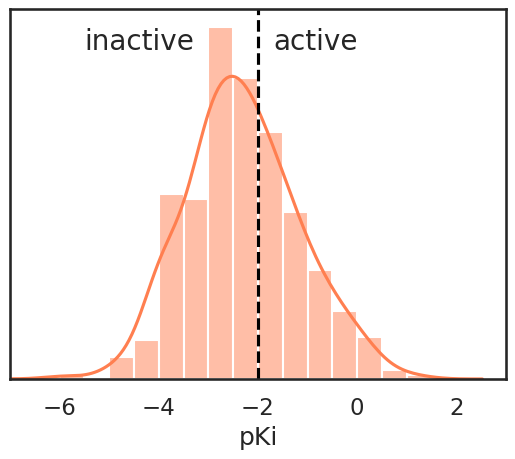

In [148]:
sns.set_context("talk", font_scale=1)
sns.set_style("white")
plt.yticks([])
plt.xlim(-7, 3)
fig = sns.histplot(data=df, x='pKi', binwidth=0.5, stat='density', color='coral', 
             kde=True, kde_kws={'bw_adjust': 2})
plt.axvline(x=-2, color='k', linestyle='--')
plt.annotate('active', xy=(-1.7, 0.38), fontsize=20)
plt.annotate('inactive', xy=(-5.5, 0.38), fontsize=20)
plt.savefig(f"plots/D2_pKi.pdf", format='pdf', bbox_inches='tight')

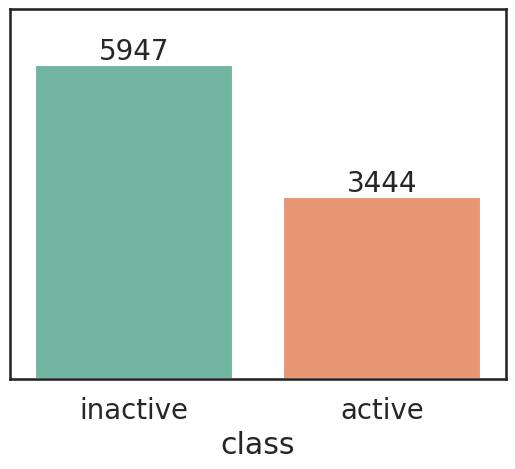

In [149]:
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
df_ = pd.DataFrame(df['activity'].value_counts()).reset_index()
df_.columns = ['activity', 'count']
df_['activity'] = ['inactive', 'active']
fig = sns.barplot(data=df_, x='activity', y='count', palette='Set2')
fig.bar_label(fig.containers[0], fontsize=20)
plt.ylabel('')
plt.yticks([])
plt.xlabel('class')
plt.ylim(0, 7000)
plt.savefig(f"plots/D2_activity_classes.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/3935897701.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='num_HBA', binwidth=2, stat='density', palette='Set2',


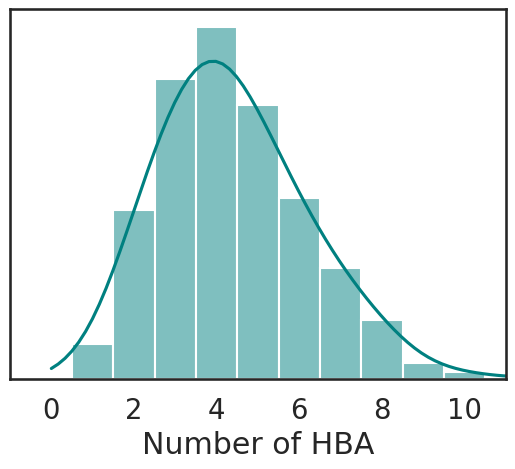

In [184]:
df['num_HBA'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBA)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
plt.xlim(-1,11)
fig = sns.histplot(df, x='num_HBA', binwidth=2, stat='density', palette='Set2', 
             kde=True, kde_kws={'bw_adjust': 2}, discrete=True, legend=False, color='teal')
fig.set(xlabel='Number of HBA')
plt.savefig(f"plots/D2_HBA.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/4269481272.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='num_HBD', binwidth=1, stat='density', palette='Set2',


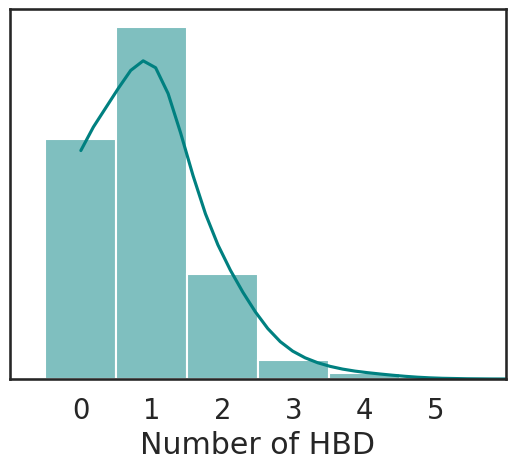

In [185]:
df['num_HBD'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBD)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
plt.xlim(-1,6)
plt.xticks([0, 1, 2, 3, 4, 5])
fig = sns.histplot(df, x='num_HBD', binwidth=1, stat='density', palette='Set2', 
            kde=True, kde_kws={'bw_adjust': 2}, discrete=True, color='teal',
                   legend=False)
fig.set(xlabel='Number of HBD')
plt.savefig(f"plots/D2_HBD.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/2274582683.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='logP', binwidth=1, stat='density', palette='Set2', color='teal',


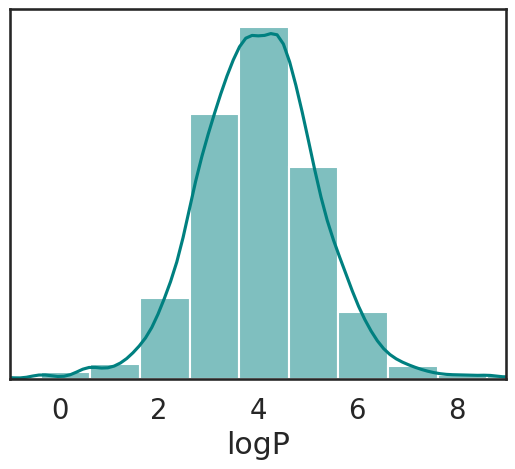

In [186]:
import rdkit.Chem.Crippen as Crippen
df['logP'] = df['mol'].apply(Chem.Crippen.MolLogP)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.xlim(-1, 9)

plt.yticks([])
fig = sns.histplot(df, x='logP', binwidth=1, stat='density', palette='Set2', color='teal',
            kde=True, kde_kws={'bw_adjust': 1}, legend=False)
fig.set(xlabel='logP')
plt.savefig(f"plots/D2_logP.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/3787878223.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='tpsa', binwidth=20, stat='density', palette='Set2', color='teal',


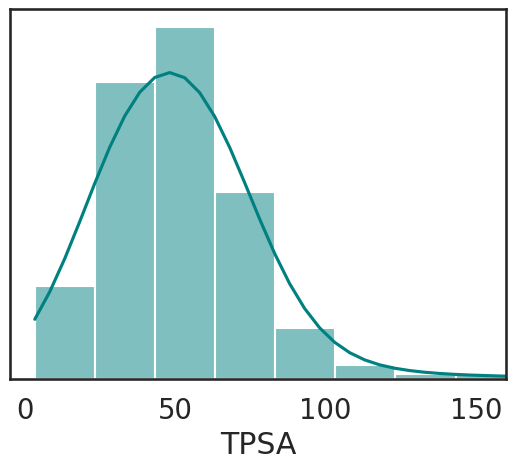

In [187]:
df['tpsa'] = df['mol'].apply(Chem.rdMolDescriptors.CalcTPSA)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
plt.xlim(-5,160)
fig = sns.histplot(df, x='tpsa', binwidth=20, stat='density', palette='Set2', color='teal', 
            kde=True, kde_kws={'bw_adjust': 2})
fig.set(xlabel='TPSA')
plt.savefig(f"plots/D2_TPSA.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/2962824552.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='fraction_sp3', binwidth=0.1, stat='density', palette='Set2', color='teal',


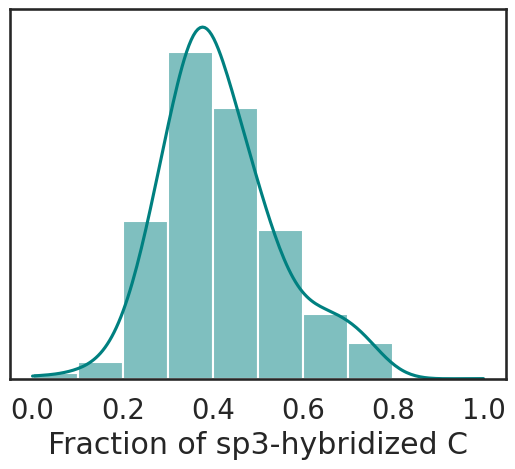

In [188]:
df['fraction_sp3'] = df['mol'].apply(CalcFractionCSP3)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.xlim(-0.05, 1.05)
plt.yticks([])
fig = sns.histplot(df, x='fraction_sp3', binwidth=0.1, stat='density', palette='Set2', color='teal',
            kde=True, kde_kws={'bw_adjust': 2}, legend=False)
fig.set(xlabel='Fraction of sp3-hybridized C')
plt.savefig(f"plots/D2_fracsp3.pdf", format='pdf', bbox_inches='tight')

/tmp/ipykernel_6771/2615660371.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(df, x='mol_wt', binwidth=50, stat='density', palette='Set2', color='teal',


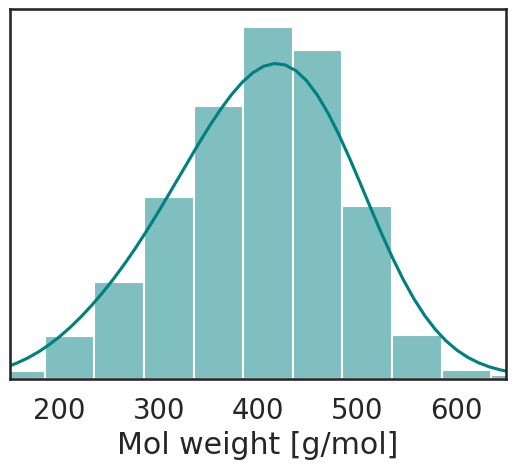

In [189]:
df['mol_wt'] = df['mol'].apply(Chem.rdMolDescriptors.CalcExactMolWt)
sns.set_context("talk", font_scale=1.2)
plt.xlim(150, 650)
sns.set_style("white")
plt.yticks([])
fig = sns.histplot(df, x='mol_wt', binwidth=50, stat='density', palette='Set2', color='teal',
            kde=True, kde_kws={'bw_adjust': 2}, legend=False)
fig.set(xlabel='Mol weight [g/mol]')
plt.savefig(f"plots/D2_MW.pdf", format='pdf', bbox_inches='tight')

In [1]:
import pandas as pd
import rdkit.Chem.Draw as Draw
df = pd.read_csv('docking/outputs/concat_20231004-090641.csv')
df1 = pd.read_csv('docking/outputs_valid_1k_seed42/concat_20231004-090641.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'docking/outputs/concat_20231004-090641.csv'

In [21]:
from src.utils.modelinit import initialize_model
from src.utils.vectorizer import SELFIESVectorizer
import torch
import rdkit.Chem as Chem
import rdkit.Chem.AllChem
import rdkit.Chem.Draw as Draw
import selfies as sf

model = initialize_model('models/GRUv3_ECFP_tola/hyperparameters.ini', dropout=False, device='cuda')
model.load_state_dict(torch.load('models/GRUv3_ECFP_tola/epoch_150.pt'))

<All keys matched successfully>

In [30]:
drug = 'CCN1CCCC1CNC(=O)C1=C(OC)C=CC(=C1)S(N)(=O)=O'
mol = Chem.MolFromSmiles(drug)
ECFP = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
ECFP = torch.tensor(ECFP).float().unsqueeze(0).to('cuda')
encoded_mu = model.encoder(ECFP)[0]
encoded_mus = encoded_mu.repeat(50, 1)
randomized_mus = []
for i, mu in enumerate(encoded_mus):
    new_mu = mu + torch.randn_like(mu) * i * 0.05
    randomized_mus.append(new_mu)
randomised_mus = torch.stack(randomized_mus)

pdist = torch.nn.PairwiseDistance(p=2)
distances = pdist(encoded_mus, randomised_mus)
distances

tensor([5.6569e-06, 2.1687e-01, 5.0421e-01, 4.7575e-01, 8.9168e-01, 1.2904e+00,
        1.8741e+00, 1.7364e+00, 2.5934e+00, 3.6481e+00, 2.4203e+00, 3.3812e+00,
        3.2881e+00, 3.0593e+00, 2.8521e+00, 4.1356e+00, 4.6294e+00, 4.7295e+00,
        4.7783e+00, 4.9713e+00, 6.1134e+00, 5.2862e+00, 5.7407e+00, 5.9435e+00,
        7.0866e+00, 6.8503e+00, 7.3926e+00, 6.9185e+00, 8.8703e+00, 6.5179e+00,
        8.4649e+00, 8.9466e+00, 9.4913e+00, 8.9255e+00, 9.6877e+00, 1.1315e+01,
        1.1492e+01, 1.1548e+01, 1.2901e+01, 1.0758e+01, 1.1571e+01, 9.1334e+00,
        1.1293e+01, 1.2860e+01, 1.2280e+01, 1.0710e+01, 1.1665e+01, 1.1989e+01,
        1.2790e+01, 1.0554e+01], device='cuda:0', grad_fn=<NormBackward1>)

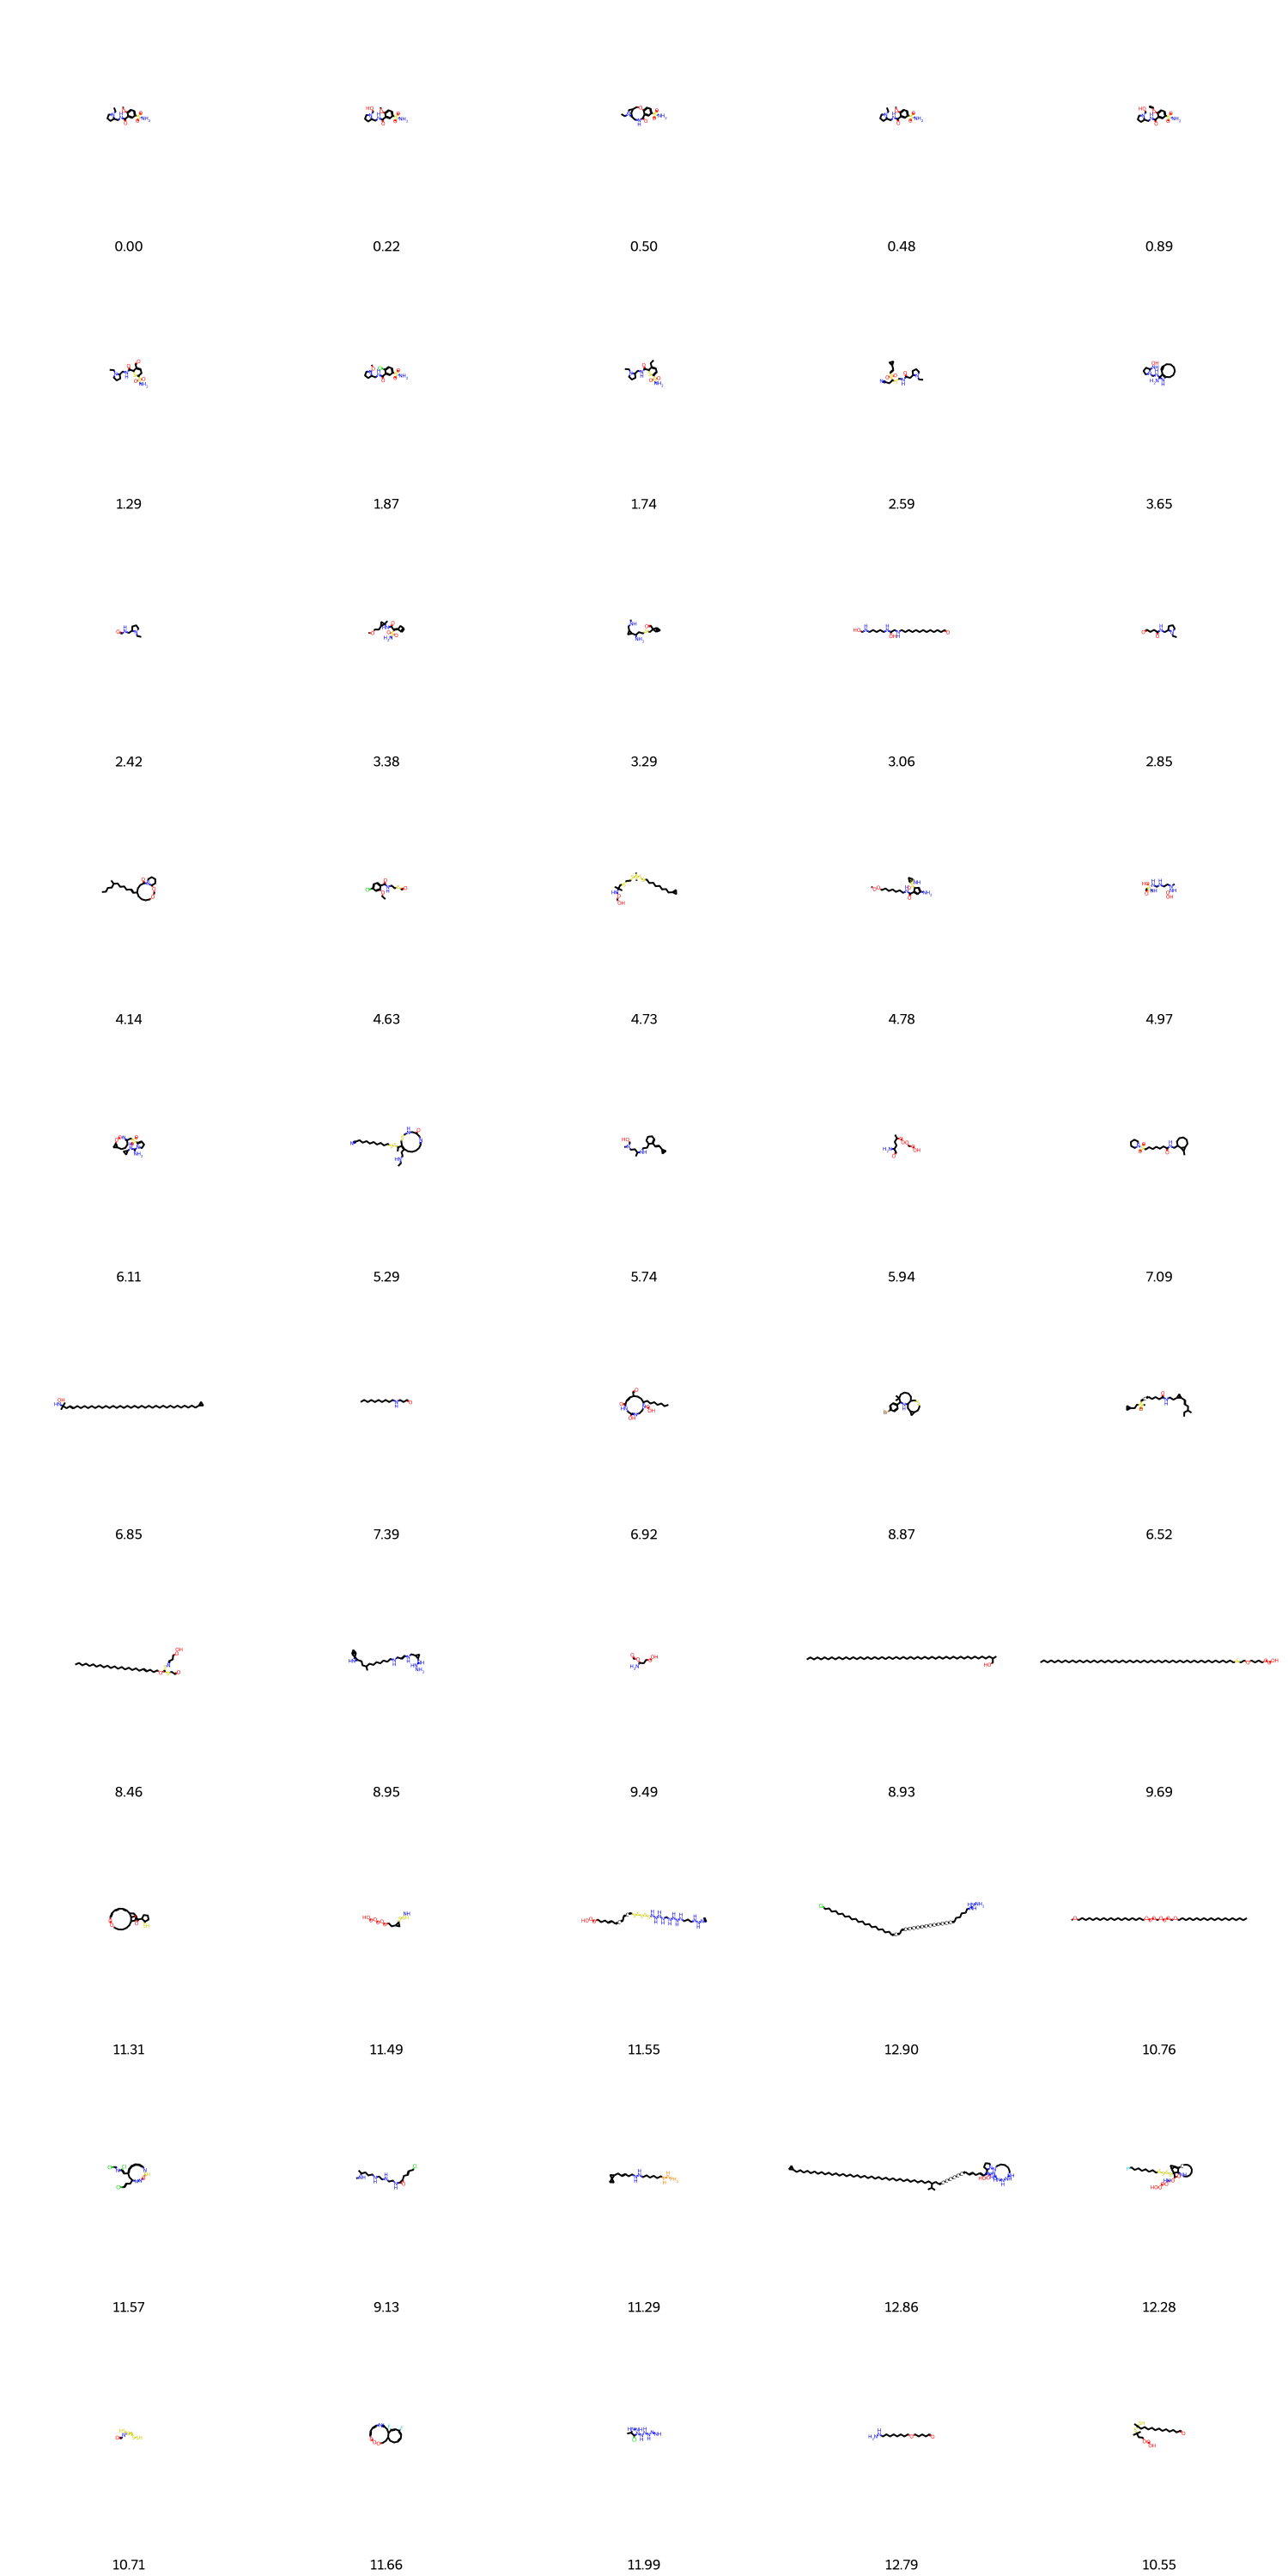

In [31]:
vectorizer = SELFIESVectorizer(pad_to_len=128)
decoded = model(randomised_mus, _, omit_encoder=True)[0].cpu().detach().numpy()
smiles_list = []
for x in decoded:
    selfies = vectorizer.devectorize(x, remove_special=True)
    smiles = sf.decoder(selfies)
    smiles_list.append(smiles)
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(300, 300), legends=[f'{x:.2f}' for x in distances])

In [32]:
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
drawer = Draw.rdMolDraw2D.MolDraw2DSVG(400,400)

for i, mol in enumerate(mol_list):
    rdDepictor.Compute2DCoords(mol)
    Draw.MolToFile(mol, f'plots/latent_space/{i}.png', size=(400, 400))

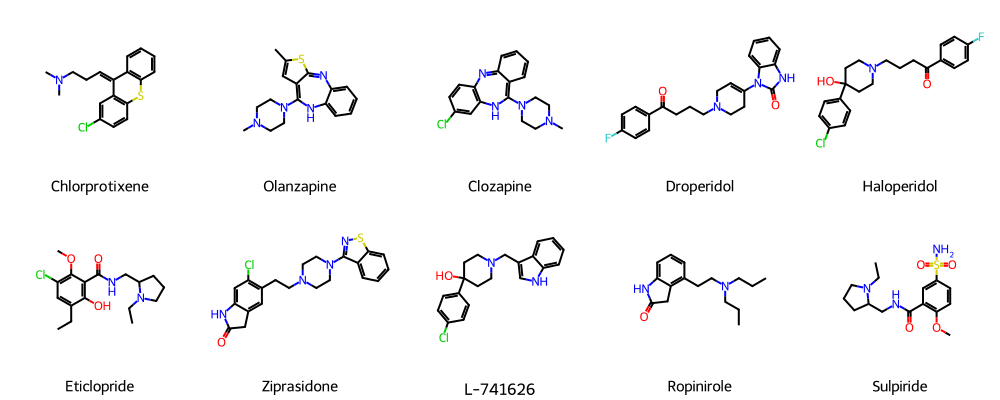

In [33]:
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdAbbreviations
from rdkit.Chem.Draw import rdMolDraw2D
IPythonConsole.drawOptions.minFontSize=12
df = pd.read_csv('data/d2_drugs.csv')
df['mol'] = df['smiles'].apply(Chem.MolFromSmiles)
df['mol'].apply(rdDepictor.Compute2DCoords)
df['mol'].apply(rdDepictor.StraightenDepiction)
img = Draw.MolsToGridImage(df['mol'].tolist(), molsPerRow=5, legends=df['name'].tolist(), useSVG=True, subImgSize=(200, 200))
img

In [34]:
with open('grid.svg', 'w') as f:
    f.write(img.data)